# Machine Learning Capstone Project

## Explore CIFAR 15

### Import required packages

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import os

### Extract CIFAR 15

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#### Extract Meta data

In [3]:
cifar_15_meta = unpickle("cifar-15-python/meta")

#### Extract Training and Testing data using functions similar to Keras

In [13]:
def extract_data(fpath, label_key='labels'):
    f = open(fpath, 'rb')
    d = pickle.load(f, encoding='bytes')
    # decode utf8
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    f.close()
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels

def load_data(path, label_mode='fine'):
    fpath = os.path.join(path, 'train')
    x_train, y_train = extract_data(fpath, label_key=label_mode + '_labels')

    fpath = os.path.join(path, 'test')
    x_test, y_test = extract_data(fpath, label_key=label_mode + '_labels')

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    x_train = x_train.transpose(0, 2, 3, 1)
    x_test = x_test.transpose(0, 2, 3, 1)

    return (x_train, y_train), (x_test, y_test)

In [14]:
(X_train, y_train), (X_test, y_test) = load_data('cifar-15-python', 'fine')

### CIFAR 15 data exploration

In [15]:
def findNumOfImagesInEachClass(data, meta):
    image_counts = {}
    for label in data:
        index = label.item()
        label_name = meta[b'fine_label_names'][index].decode('utf-8')
        image_counts[label_name] = image_counts.setdefault(label_name, 0) + 1
    return image_counts

In [16]:
train_image_counts = findNumOfImagesInEachClass(y_train, cifar_15_meta)
test_image_counts = findNumOfImagesInEachClass(y_test, cifar_15_meta)

In [17]:
def plotImageCounts(data, title):
    X = np.arange(len(data))
    plt.figure(figsize = (18,5))
    plt.bar(X, data.values(), 0.5, color='g')
    plt.xticks(X, data.keys(), rotation=50, fontsize = 12, ha = 'right')
    plt.title(title, fontsize = 15)
    plt.ylabel('# Of images', fontsize = 15)
    plt.show()

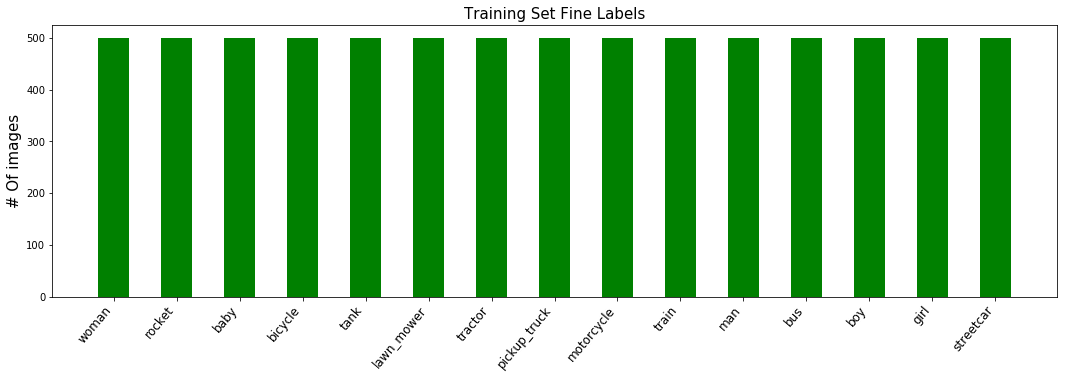

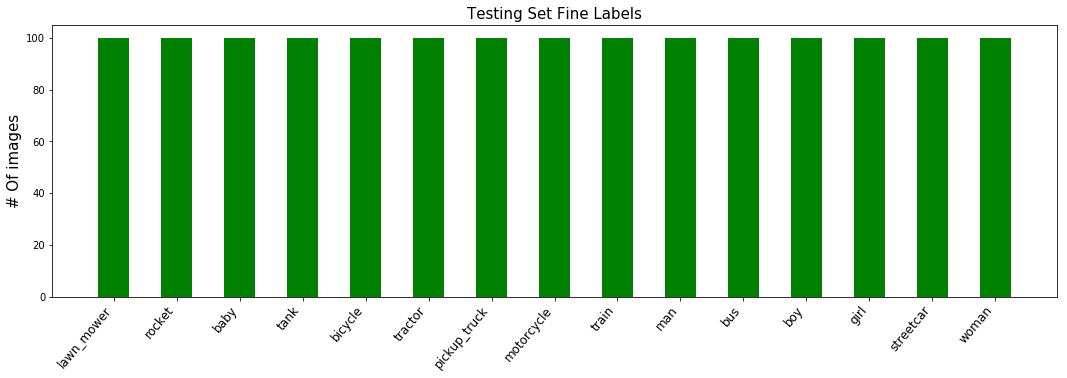

In [18]:
plotImageCounts(train_image_counts, 'Training Set Fine Labels')
plotImageCounts(test_image_counts, 'Testing Set Fine Labels')

### Visualize CIFAR 15

In [10]:
def cifar15_3x3subplot(data, label, meta):
    fig = plt.figure(figsize=(5,5))
    random.seed(52)
    for index in range(9):
        ax = fig.add_subplot(3, 3, 1+index, xticks=[], yticks=[])
        im_idx = random.randint(0, len(data))
        img = data[im_idx]
        title = meta[b'fine_label_names'][label[im_idx].item()].decode('utf-8')
        
        ax.set_title(title)
        plt.imshow(img) 
        
    fig.tight_layout()
    plt.show()

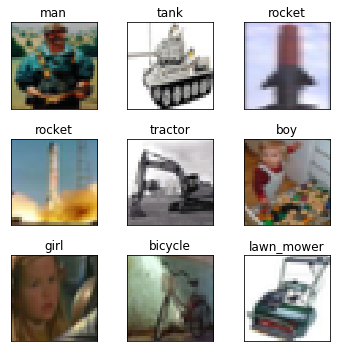

In [11]:
cifar15_3x3subplot(X_train, y_train, cifar_15_meta)

### Convert from Color to Grayscale

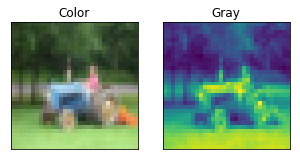

In [12]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
img = X_train[11]
npgray = np.dot(img[...,:3], [0.299, 0.587, 0.114])
npgray = npgray.astype(int)
ax.set_title('Color')
plt.imshow(img) 
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.set_title('Gray')
plt.imshow(npgray) 
plt.show()